# Problem Statement

Perform Principal component analysis and perform clustering using first 
<br>3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
<br>optimum number of clusters and check whether we have obtained same number of clusters with the original data 
<br>(class column we have ignored at the begining who shows it has 3 clusters)df


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
wn = pd.read_csv('wine.csv')
wn.head(6)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
# Data Description

wn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
wn.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
wn.duplicated().sum()

0

In [6]:
wn.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

# PCA

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
sc = StandardScaler()

x = sc.fit_transform(wn)

In [9]:
x

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [10]:
pca = PCA()
pcs = pca.fit_transform(x)
pcs

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [11]:
np.cumsum(pca.explained_variance_ratio_)

array([0.39542486, 0.57378745, 0.67707846, 0.74335831, 0.80603706,
       0.85409266, 0.89364973, 0.91865217, 0.93969088, 0.95842703,
       0.97455906, 0.98661596, 0.99587055, 1.        ])

In [12]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(x)
pcs

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01],
       [-3.92258841e+00, -2.76821026e+00, -1.74968168e-01],
       [-1.40751111e+00, -8.67773087e-01,  2.02582949e+00],
       [-3.28812981e+00, -2.13017513e+00, -6.28992339e-01],
       [-2.75057754e+00, -1.17916999e+00, -9.77337471e-01],
       [-2.39286652e+00, -1.61128232e+00,  1.45729462e-01],
       [-2.79525633e+00, -9.23179517e-01, -1.77092548e+00],
       [-3.00559666e+00, -7.96284169e-01, -9.83741629e-01],
       [-3.67868855e+00, -1.31252342e+00, -4.21854170e-01],
       [-2.10963477e+00, -6.12981986e-01, -1.19156995e+00],
       [-2.43845636e+00, -6.78523310e-01, -8.65513701e-01],
       [-3.67349453e+00, -1.14012136e+00, -1.20376870e+00],
       [-4.44157575e+00, -2.11031917e+00, -1.26245041e+00],
       [-2.60892387e+00, -1.66641801e+00,  2.17632760e-01],
       [-2.47542846e+00, -2.33089672e+00

In [13]:
np.cumsum(pca.explained_variance_ratio_)

array([0.39542486, 0.57378745, 0.67707846])

In [14]:
data = pd.DataFrame(pcs, columns=['pc1','pc2','pc3'])
data['Type'] = wn['Type']

In [15]:
data

,pc1,pc2,pc3,Type
0,-3.522934,-1.453098,-0.164795,1
1,-2.528858,0.330019,-2.026707,1
2,-2.785029,-1.036936,0.983238,1
3,-3.922588,-2.768210,-0.174968,1
4,-1.407511,-0.867773,2.025829,1
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,3
174,2.942729,-1.752263,0.207480,3
175,3.027272,-2.756040,-0.940803,3
176,2.755222,-2.293784,-0.550474,3


<Axes: >

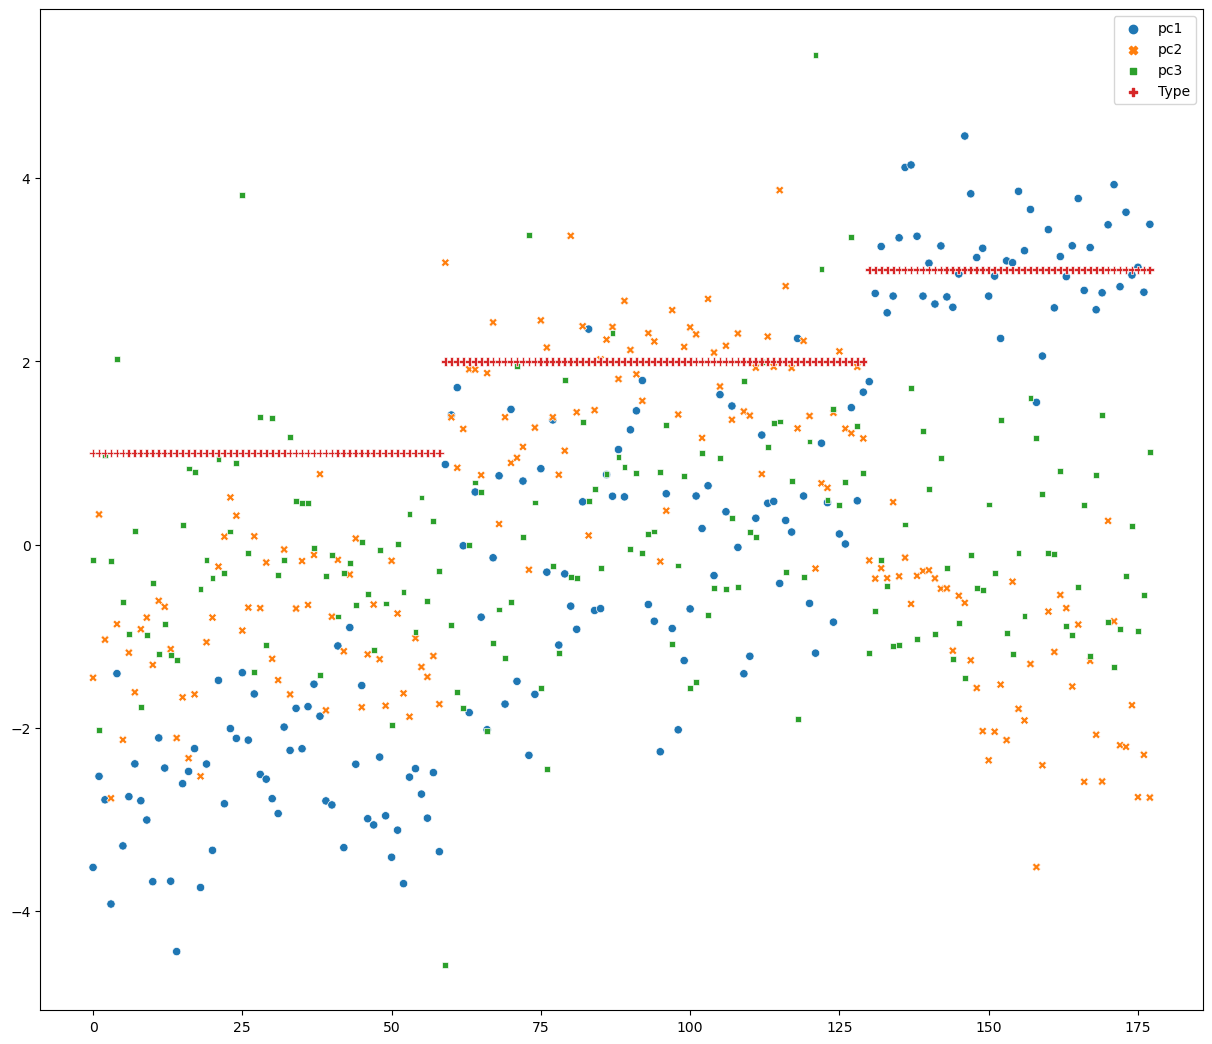

In [16]:
plt.figure(figsize=(15,13))
sns.scatterplot(data=data)

# Hierarchical Clustering

In [17]:
from scipy.cluster import hierarchy
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering

In [18]:
wn_norm = pd.DataFrame(normalize(wn), columns=wn.columns)

In [19]:
wn_norm.head(6)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.000932,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.000948,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.000841,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996175
3,0.000674,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.001343,0.017775,0.003477,0.003853,0.028193,0.158417,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986752
5,0.000688,0.009763,0.001210,0.001684,0.010450,0.077002,0.002248,0.002331,0.000234,0.001354,0.004641,0.000722,0.001959,0.996907


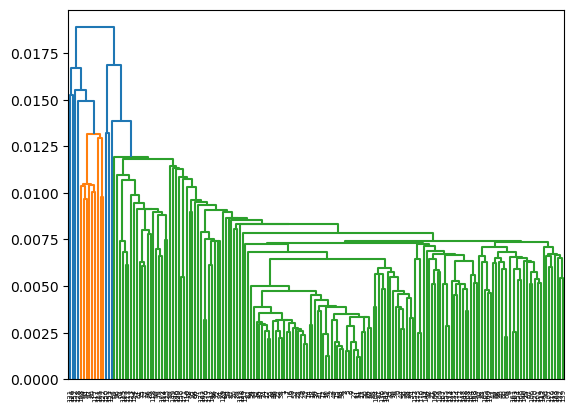

In [20]:
lk = hierarchy.linkage(wn_norm, method='single')
dendo = hierarchy.dendrogram(lk)

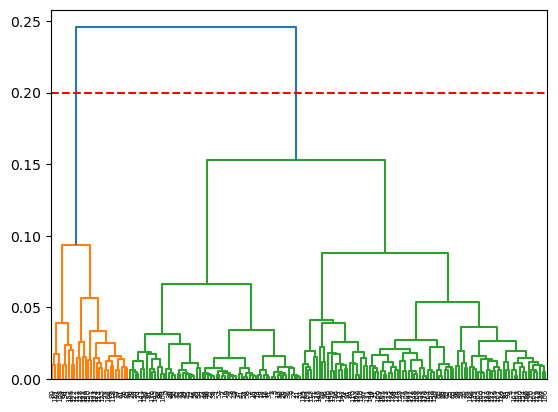

In [21]:
lk = hierarchy.linkage(wn_norm, method='complete')
dendo = hierarchy.dendrogram(lk)
plt.axhline(y=0.2, c='red', linestyle='--')

# Model Building

In [22]:
hc = AgglomerativeClustering(n_clusters=3)

y = hc.fit_predict(wn_norm)

In [23]:
y

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [24]:
wn['Cluster'] = y
wn.head(6)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,2


In [25]:
wn.groupby('Cluster').agg('mean')

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Cluster,,,,,,,,,,,,,,
0,2.319588,12.887732,2.593608,2.361753,20.193814,98.680412,2.031959,1.522165,0.400928,1.444124,5.328557,0.882124,2.346392,660.453608
1,2.083333,12.309722,2.195556,2.306667,20.905556,97.416667,2.313056,2.162778,0.350000,1.603611,3.492222,1.011944,2.727222,411.416667
2,1.000000,13.796667,1.894444,2.424667,16.860000,103.888889,2.848000,3.015556,0.287111,1.897111,5.727778,1.076222,3.091111,1201.600000


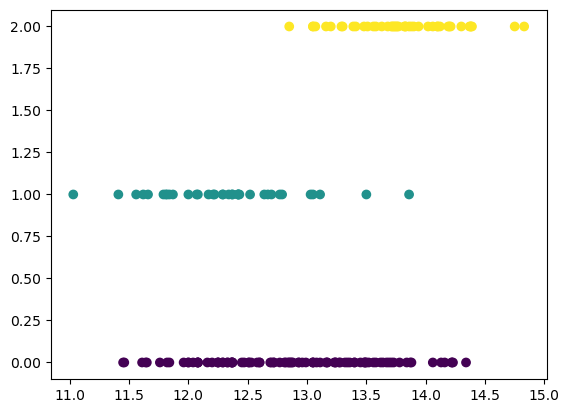

In [26]:
plt.scatter(wn['Alcohol'], wn['Cluster'], c=y)

# K-means

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

x = sc.fit_transform(wn)
x

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  1.84791957,
         1.01300893, -0.83865922],
       [-1.21394365,  0.24628963, -0.49941338, ...,  1.1134493 ,
         0.96524152,  1.53088587],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.78858745,
         1.39514818,  1.53088587],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.48544548,
         0.28057537, -0.83865922],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.40069891,
         0.29649784, -0.83865922],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.42894777,
        -0.59516041, -0.83865922]])

In [29]:
wn_sc = pd.DataFrame(x, columns=wn.columns)
wn_sc.head(5)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-0.838659
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1.530886
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1.530886
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1.530886
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-0.838659


In [30]:
km = KMeans()
y = km.fit_predict(x)
y

array([3, 0, 7, 7, 3, 7, 0, 0, 0, 0, 7, 0, 0, 7, 7, 7, 7, 7, 7, 3, 3, 3,
       0, 0, 3, 3, 0, 0, 3, 0, 7, 7, 0, 7, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3,
       3, 0, 0, 0, 7, 7, 0, 7, 7, 7, 0, 7, 3, 7, 7, 5, 2, 5, 5, 4, 2, 2,
       5, 5, 2, 5, 2, 4, 5, 3, 4, 5, 5, 2, 5, 4, 5, 5, 2, 1, 4, 5, 2, 2,
       2, 2, 2, 2, 2, 4, 4, 3, 2, 5, 4, 4, 5, 5, 4, 5, 5, 2, 5, 2, 5, 4,
       4, 4, 2, 2, 2, 2, 5, 5, 1, 5, 4, 3, 2, 4, 4, 4, 4, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6,
       1, 1, 6, 6, 6, 6, 1, 1, 1, 1, 6, 1, 6, 1, 6, 6, 1, 1, 6, 1, 6, 6,
       6, 6])

In [31]:
df = pd.DataFrame(x, columns=wn.columns)
df['Cluster'] = y
df.head(5)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,7
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,7
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,3


In [32]:
km.cluster_centers_

array([[-1.21394365,  0.86598088, -0.31464438, -0.10149732, -0.93186756,
         0.01814502,  0.58600625,  0.75328996, -0.74349859,  0.21451547,
        -0.0436924 ,  0.37680174,  0.84685072,  1.13640806,  1.53088587],
       [ 1.29038669, -0.05176785,  1.01995389, -0.01085076,  0.32117651,
        -0.30347738, -1.13499259, -1.31316773,  0.81423561, -1.10030121,
         0.37953429, -1.01771151, -1.21662572, -0.44035293, -0.80044075],
       [ 0.07996036, -1.10904309, -0.40605641,  0.26421954,  0.63451906,
        -0.5014337 , -0.56580307, -0.30407106,  0.82629632, -0.32465922,
        -0.96795747,  0.56680275, -0.1091612 , -0.68891191, -0.3647502 ],
       [-0.98560765,  0.44320539, -0.05797433,  0.76745247, -0.13096038,
         1.33567771,  0.88345868,  0.94505252, -0.45574802,  0.69616683,
        -0.14293965,  0.34927334,  1.04947395,  0.27064724, -0.76896671],
       [ 0.07996036, -0.95466242,  0.08307026, -0.22892656,  0.23507329,
        -0.55526393,  0.90246673,  0.65442712, 

# Elbow Graph

In [33]:
wcss = []

for i in range (1,21):
    km= KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [34]:
wcss

[2670.0,
 1854.234520216228,
 1379.0781523805458,
 1255.0863554168016,
 1173.9501229403766,
 1114.8009440148803,
 1057.8957827780562,
 1011.2315200288944,
 957.7972429190702,
 918.6348438411192,
 900.2218483916729,
 857.5440679041654,
 816.2387061254215,
 796.0496775781066,
 759.0331566276498,
 756.4432619920806,
 726.3194188631203,
 716.8886832556699,
 693.4336691056257,
 683.3829002032198]

Text(0.5, 1.0, 'Elbow Curve')

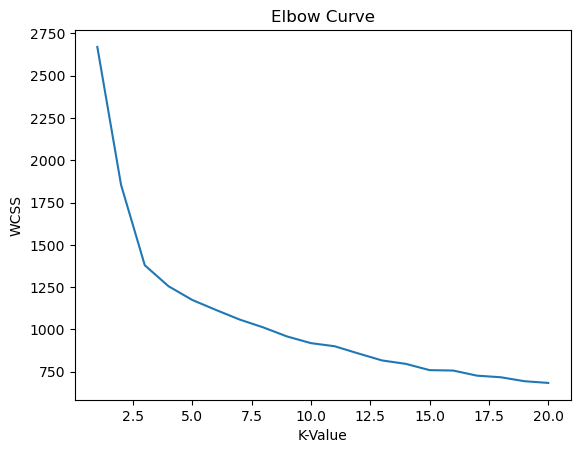

In [35]:
plt.plot(range(1,21), wcss)
plt.xlabel('K-Value')
plt.ylabel('WCSS')
plt.title('Elbow Curve')

# Final Model

In [36]:
km = KMeans(n_clusters=3)
y = km.fit_predict(x)
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [37]:
wn['Cluster'] = y
wn.head(6)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,2


In [38]:
wn.groupby('Cluster').agg('mean')

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Cluster,,,,,,,,,,,,,,
0,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
1,1.985507,12.268406,1.944203,2.239855,20.042029,93.188406,2.254638,2.081449,0.362319,1.602174,3.083478,1.050812,2.791594,509.101449
2,1.033333,13.719333,1.964000,2.456500,17.278333,107.866667,2.845500,2.974833,0.288667,1.927333,5.462667,1.071833,3.157333,1117.816667


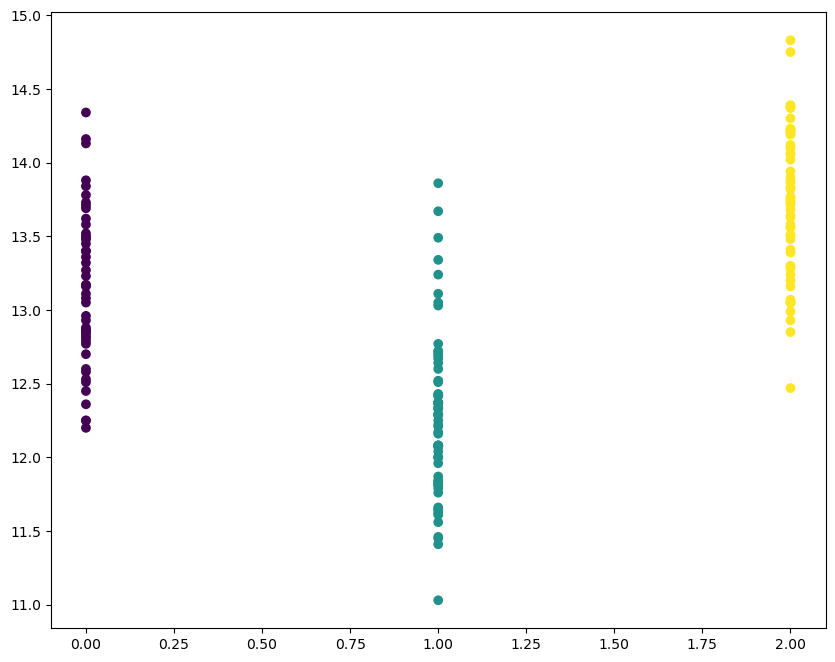

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(wn['Cluster'], wn['Alcohol'], c=km.labels_)